- Final Project
- Yinzhe (Ricardo) Lu
- Dr. Kamesam
- Fall 2020

This is a mini data mining project for Dr. Kamesam's class. We require good programming practices in this class, inclduing clear markdowns and namings of variables/columns/dataframes. This data analysis is about 

## Problem 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.precision', 2)

### 1.1

In [2]:
births = pd.read_csv("births.csv")

In [3]:
births.head()

,birth_year,gender,ethnicity,first_name,frequency
0,2011,female,hispanic,geraldine,13
1,2011,female,hispanic,gia,21
2,2011,female,hispanic,gianna,49
3,2011,female,hispanic,giselle,38
4,2011,female,hispanic,grace,36


In [4]:
births.isna().sum()

birth_year    0
gender        0
ethnicity     0
first_name    0
frequency     0
dtype: int64

In [5]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19418 entries, 0 to 19417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  19418 non-null  int64 
 1   gender      19418 non-null  object
 2   ethnicity   19418 non-null  object
 3   first_name  19418 non-null  object
 4   frequency   19418 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 758.6+ KB


In [6]:
births.describe()

,birth_year,frequency
count,19418.00,19418.00
mean,2013.12,33.52
std,1.60,38.24
min,2011.00,10.00
25%,2012.00,13.00
50%,2013.00,20.00
75%,2014.00,36.00
max,2016.00,426.00


There is no missing value in this dataset. This dataset has records from 2011 to 2016. It has 5 columns: birth_year, gender, ethnicity, first_name, frequency and 19418 rows. Frequency varies from 10 to 426.

### 1.2

In [7]:
births["frequency"].sum()

650893

In total, 650893 babies were reported born in the dataset.

### 1.3

In [8]:
births.groupby("gender")["frequency"].sum()

gender
female    286587
male      364306
Name: frequency, dtype: int64

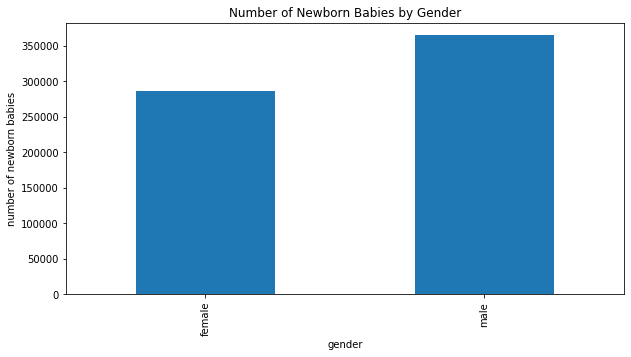

In [9]:
births.groupby("gender")["frequency"].sum().plot.bar(figsize=(10,5))
plt.ylabel('number of newborn babies')
plt.title('Number of Newborn Babies by Gender')
plt.show()

In total, there are 286587 new born female babies and 364306 male babies were reported in the dataset. There are more male new born babies as reported.

### 1.4

In [10]:
births.groupby("birth_year")["frequency"].sum()

birth_year
2011    133981
2012    132662
2013    123998
2014    121912
2015     69600
2016     68740
Name: frequency, dtype: int64

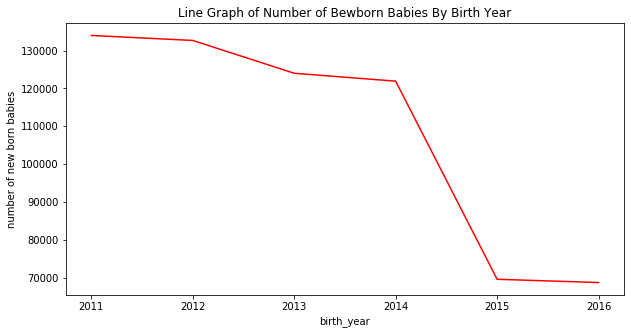

In [11]:
births.groupby("birth_year")["frequency"].sum().plot(figsize=(10,5), color = "red")
plt.ylabel('number of new born babies')
plt.title('Line Graph of Number of Bewborn Babies By Birth Year')
plt.show()

The number of newborn babies was droping from 2011 to 2016. The number dropped most dramatically from 121912 in 2014 to 69600 in 2015.

### 1.5

In [12]:
births[(births["first_name"] == "emma") & (births["birth_year"] == 2013)]["frequency"].sum()

721

As showed above, 721 babies born in the year 2013 were given the name emma.

### 1.6

In [13]:
births["ethnicity"].unique()

array(['hispanic', 'white non hispanic', 'asian and pacific islander',
       'black non hispanic', 'asian and paci', 'black non hisp',
       'white non hisp'], dtype=object)

In [14]:
births_clean = births.copy()
births_clean["ethnicity"].replace({"asian and paci": "asian and pacific islander", 
                                  "black non hisp": "black non hispanic",
                                 "white non hisp":"white non hispanic"}, inplace=True)

In [15]:
births_clean.groupby("ethnicity")["frequency"].sum().sort_values()

ethnicity
asian and pacific islander     88175
black non hispanic             94831
hispanic                      216716
white non hispanic            251171
Name: frequency, dtype: int64

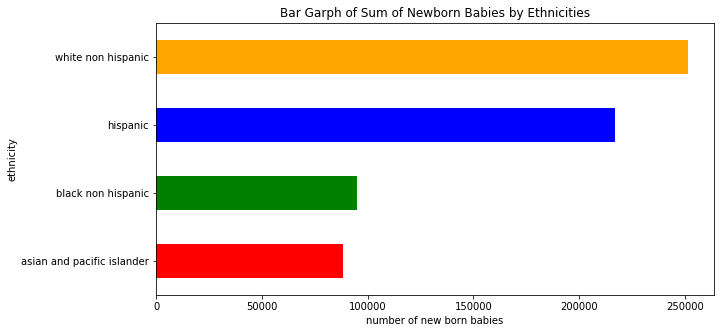

In [16]:
births_clean.groupby("ethnicity")["frequency"].sum().plot.barh(figsize=(10,5), color=['red', 'green', 'blue', 'orange'])
plt.xlabel('number of new born babies')
plt.title('Bar Garph of Sum of Newborn Babies by Ethnicities')
plt.show()

Most of newborn babies in nyc as reported in the dataset are white non-hispanic, as large as 251171. Asian asian and pacific islander has the least newborn babies, which has 88175 in total.

### 1.7

In [17]:
names = births.groupby("first_name")["frequency"].sum().reset_index()
names.sort_values("frequency", ascending = False, inplace = True)
names.reset_index(drop=True, inplace = True)

In [18]:
names[:10]

,first_name,frequency
0,ethan,5913
1,jacob,5803
2,matthew,5031
3,david,4977
4,jayden,4834
5,michael,4796
6,daniel,4744
7,aiden,4613
8,liam,4504
9,noah,4500


The ten most popular names in the dataset are Ethan, Jacob, Matthew, David, Jayden, Micheal, Daniel, Daniel, Aiden, Liam, Noah. Their frequences range from 5913 to 4500 in the dataset.

### 1.8

In [19]:
female_names = births[births["gender"] == "female"].groupby("first_name")["frequency"].sum().reset_index()
female_names.sort_values("frequency", ascending = False, inplace = True)
female_names.reset_index(drop=True, inplace = True)

In [20]:
female_names[:10]

,first_name,frequency
0,sophia,4382
1,isabella,4244
2,emma,4222
3,olivia,4183
4,mia,3915
5,emily,3886
6,leah,3425
7,chloe,3138
8,ava,3083
9,madison,3082


The ten most popular names in the dataset are Sophia, Isabella, Emma, Olivia, Mia, Emily, Leah, Chloe, Ave, Madison. Their frequences range from 4382 to 3083 in the dataset.

### 1.9

In [21]:
births["first_name"].nunique()

1775

There are 1775 distinct first names are there in the dataset.

### 1.10

In [22]:
births.groupby("gender")["first_name"].nunique()

gender
female    974
male      830
Name: first_name, dtype: int64

There are 830 distict male babies' names and 974 female babies' name.

### 1.11

In [23]:
births[births["gender"]=="male"]["first_name"].nunique() + births[births["gender"]=="female"]["first_name"].nunique()

1804

In [24]:
def intersect(a, b):
    """ return the intersection of two lists """
    return list(set(a) & set(b))

unique_male_names = births[births["gender"]=="male"]["first_name"].unique()
unique_female_names = births[births["gender"]=="female"]["first_name"].unique()
Intersected_names = intersect(unique_male_names, unique_female_names)

In [25]:
len(Intersected_names)

29

Male babies' names and female babies' name do not add up to distinct first names since the sum counts 29 first names twice for both genders' unique names.

### 1.12

In [26]:
pd.pivot_table(births, index=['ethnicity'], columns=['birth_year'], 
               values="frequency", aggfunc='sum', fill_value = 0)

birth_year,2011,2012,2013,2014,2015,2016
ethnicity,,,,,,
asian and paci,0,19485,0,0,0,0
asian and pacific islander,16091,0,16174,16868,9584,9973
black non hisp,0,19010,0,0,0,0
black non hispanic,20963,0,18260,17814,9637,9147
hispanic,47859,43688,40451,39819,22813,22086
white non hisp,0,50479,0,0,0,0
white non hispanic,49068,0,49113,47411,27566,27534


I find that in 2012, the dataset has different name for asian and pacific islander, black non hispanic, white non hispanic. I decide to replace these values to be consistant with other years

In [27]:
# replace 2012 ethnicity values to be consistant with other years
births_clean = births.copy()
births_clean["ethnicity"].replace({"asian and paci": "asian and pacific islander", 
                                  "black non hisp": "black non hispanic",
                                 "white non hisp":"white non hispanic"}, inplace=True)

In [28]:
# create new pivot table
year_ethnicity = pd.pivot_table(births_clean, index=['ethnicity'], columns=['birth_year'], values="frequency", 
                                aggfunc='sum', fill_value = 0)
year_ethnicity

birth_year,2011,2012,2013,2014,2015,2016
ethnicity,,,,,,
asian and pacific islander,16091,19485,16174,16868,9584,9973
black non hispanic,20963,19010,18260,17814,9637,9147
hispanic,47859,43688,40451,39819,22813,22086
white non hispanic,49068,50479,49113,47411,27566,27534


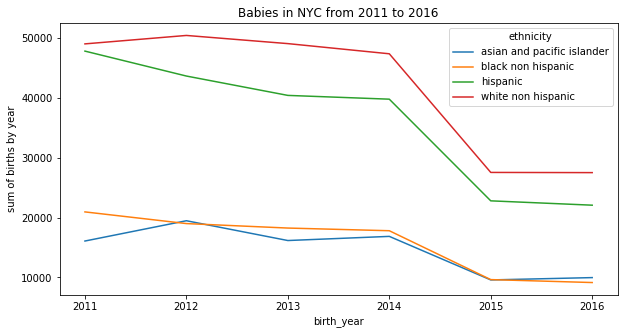

In [29]:
births_clean.pivot_table('frequency', index='birth_year',
                    columns='ethnicity', aggfunc='sum').plot(figsize=(10,5))
plt.title("Babies in NYC from 2011 to 2016")
plt.ylabel('sum of births by year')
plt.show()

I made the correction by standardizing the ethnicity column. By looking at this graph, I learned that newborn babies of all ethnicity had a tendency of dropping from 2011 to 2016. Some exceptions showed up in newborn babies of asian and pacific islander from 2011 to 2014.  Asian and pacific islander has fewer newborn babies in a lower rate; all other ethnicities has the numbers of new born babies drops by about 50% in 5 years since 2011. 

### 1.13

In [30]:
pd.crosstab(births_clean.birth_year, births_clean.gender, values = births_clean.frequency, 
            aggfunc=np.sum, normalize='index', margins = True)

gender,female,male
birth_year,,
2011,0.44,0.56
2012,0.44,0.56
2013,0.44,0.56
2014,0.45,0.55
2015,0.44,0.56
2016,0.44,0.56
All,0.44,0.56


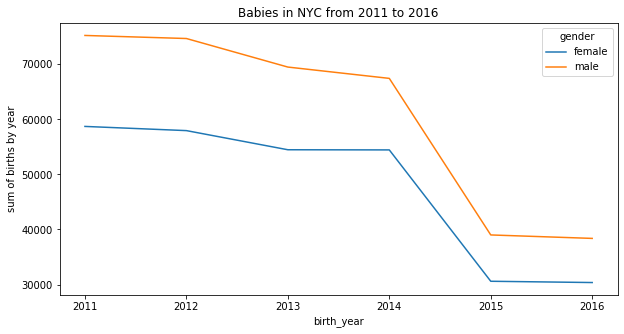

In [31]:
births_clean.pivot_table('frequency', index='birth_year',
                    columns='gender', aggfunc='sum').plot(figsize=(10,5))
plt.title("Babies in NYC from 2011 to 2016")
plt.ylabel('sum of births by year')
plt.show()

By looking at this graph and table, I learned that the gender difference in terms of absolute number difference was dropping as we can see in line graph. However, the ratio of male newborn babies and female newborn babies is relatively constant (with 1% fluctuation) about 44:46. The gender difference in terms of ratio was not dropping. As I don't see any sign of the ratio get fructuated, I support the claim that the number of female babies born in NYC is less than the number of male babies born year after year.

## Problem 2

### 2.1

In [32]:
house_prices = pd.read_excel("house_prices.xlsx")

In [33]:
house_prices.head()

,address,price,acres,size_sqft,age,rooms,baths,garages
0,9 Sycamore Road,466.0,0.23,2448,46,7,3.5,2
1,21 Jefferson St,364.0,0.22,1942,51,7,2.5,1
2,38 Hitching Post Lane,429.0,0.16,2073,29,5,3.0,2
3,4 Poppy Lane,548.4,0.46,2707,18,8,2.5,1
4,5 Daniel Drive,405.9,0.25,2042,46,7,1.5,1


In [34]:
house_prices.isna().sum()

address      0
price        0
acres        0
size_sqft    0
age          0
rooms        0
baths        0
garages      0
dtype: int64

In [35]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    30 non-null     object 
 1   price      30 non-null     float64
 2   acres      30 non-null     float64
 3   size_sqft  30 non-null     int64  
 4   age        30 non-null     int64  
 5   rooms      30 non-null     int64  
 6   baths      30 non-null     float64
 7   garages    30 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ KB


There are 30 rows and 8 columns of non-null values in the dataset. There is only one column "address" is object as its value datatype. Others have float or int as their datapypes.

## 2.2

In [36]:
house_prices["price"].describe()

count     30.00
mean     389.85
std      120.39
min      217.70
25%      314.33
50%      363.75
75%      438.52
max      749.74
Name: price, dtype: float64

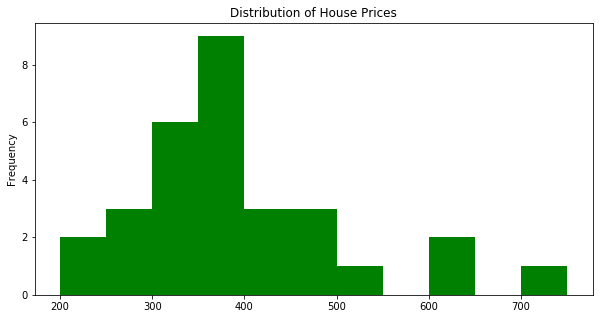

In [37]:
house_prices["price"].plot(figsize=(10,5), kind="hist", bins = list(range(200, 800, 50)), color = "green")
plt.title("Distribution of House Prices")
plt.show()

House prices has a mean of 389.85. They ranges from 217.6 to 749.74. Within each bin in the chart, most prices falled into the range from 350 to 400. Most (75 percent) of the house prices are under 438.52.

### 2.3 

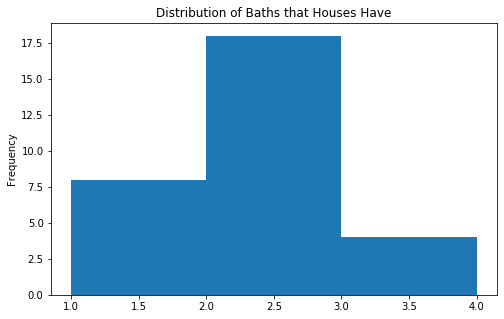

In [38]:
house_prices["baths"].plot(figsize=(8,5), kind="hist", bins = list(range(1, 5)))
plt.title("Distribution of Baths that Houses Have")
plt.show()

In [39]:
house_prices["baths"].astype(int).value_counts().sort_index()

1     8
2    18
3     4
Name: baths, dtype: int64

As the chart and table showed above, 8 houses have 1 bath, 18 houses have 2 bath and 4 houses have 3 baths. Most houses have 2 baths in our dataset.

### 2.4

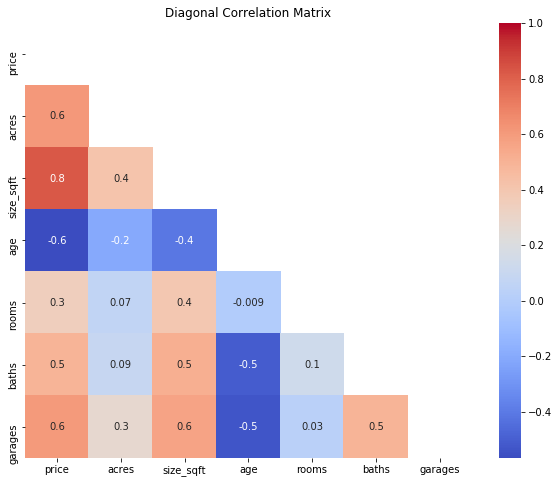

In [40]:
matrix = np.triu(house_prices.corr())
plt.figure(figsize=(10,8))
sns.heatmap(house_prices.corr(),annot = True,fmt='.1g',cmap= 'coolwarm', mask=matrix)
plt.title("Diagonal Correlation Matrix")
plt.show()

The size of the living space is strongly and positively correlated to price. Age, property acres and number of garages also have relatively strong correlation to price, where age of the house is negatively correlated. The number of rooms has the weakest correlation with price among all.

### 2.5

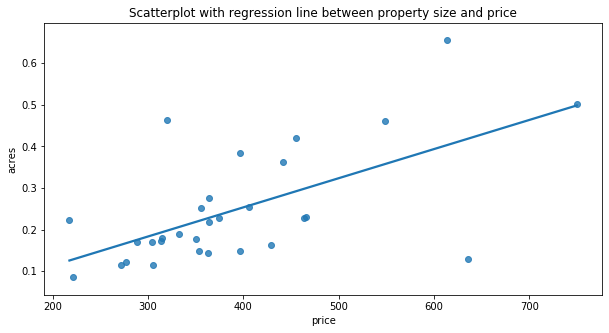

In [41]:
plt.figure(figsize=(10,5))
ax = sns.regplot(data=house_prices, x="price", y="acres", ci=None)
ax.set(title = "Scatterplot with regression line between property size and price")
plt.show()

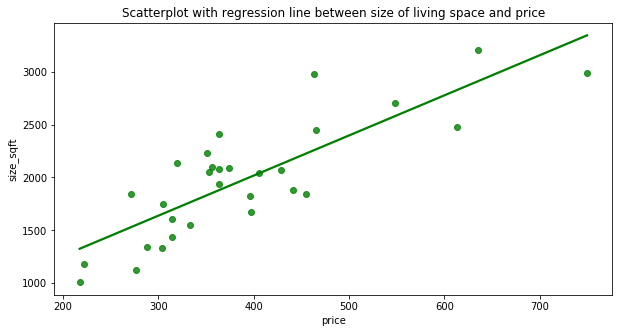

In [42]:
plt.figure(figsize=(10,5))
ax = sns.regplot(data=house_prices, x="price", y="size_sqft", ci=None, color = "green")
ax.set(title="Scatterplot with regression line between size of living space and price")
plt.show()

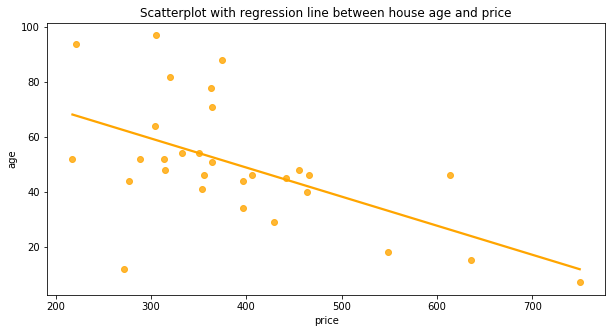

In [43]:
plt.figure(figsize=(10,5))
ax = sns.regplot(data=house_prices, x="price", y="age", ci=None, color = "orange")
ax.set(title = "Scatterplot with regression line between house age and price")
plt.show()

All of them has relatively strong correlation among all features, according to 2.4. By looking that graphs above, I see that the size of the living space is strongly and positively correlated to price. Property acres also has a positive and relatively strong correlation to price. The number of years since the house was built has nagative correlation with the market price of the house. 

Most houses are skewly distributed mostly among low price and low property size with some outliers. I don't see as many skewness in the relationship between price and living space, and the one between price and age.

### 2.6

By looking that graphs above, I see that <b> the size of the living space </b> has the strongest relationship (influence) with price. It has the largest absolude correlation by comparing the slopes of the regression lines.

### 2.7

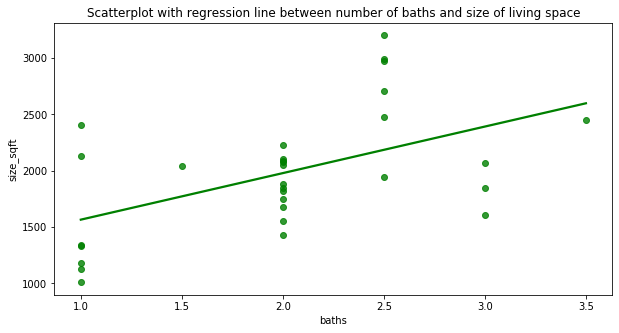

In [44]:
plt.figure(figsize=(10,5))
ax = sns.regplot(data=house_prices, x="baths", y="size_sqft", ci=None, color = "green")
ax.set(title="Scatterplot with regression line between number of baths and size of living space")
plt.show()

In [45]:
from scipy import stats

x = house_prices.baths
y = house_prices.size_sqft

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

stats.linregress(x,y)

LinregressResult(slope=413.32142857142844, intercept=1152.1904761904764, rvalue=0.5213143659171943, pvalue=0.00313553169026855, stderr=127.86270658523252)

In [46]:
print("r-squared:", r_value**2)

r-squared: 0.2717686681116463


I find a positive correlation between number of baths and size of living spaces. According to the slope, every additional bath is predicted to lead to 413 sqft more living spaces. However, this prediction will not be very accurate according to the 0.27 r-squared score.

### 2.8

In [47]:
import getpass
import datetime
print("\n\n\nFinished excution at  ",datetime.datetime.now())
print(getpass.getuser())




Finished excution at   2020-12-15 11:17:36.272580
ricardolu
